### Stock Price Predictor



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf

In [2]:
stocks = input('enter the code of the stock:-')
data = yf.download(stocks,'2008-01-01','2021-01-18', auto_adjust=True)
data.head()

enter the code of the stock:- GC=F


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2008-01-02,857.000000,857.799988,846.400024,848.700012,130
2008-01-03,866.400024,865.500000,856.299988,863.000000,181
2008-01-04,863.099976,865.500000,860.200012,861.400024,28
2008-01-07,859.599976,860.900024,857.400024,860.900024,4
2008-01-08,878.000000,879.400024,861.599976,861.599976,21


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3281 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GC=F)   3281 non-null   float64
 1   (High, GC=F)    3281 non-null   float64
 2   (Low, GC=F)     3281 non-null   float64
 3   (Open, GC=F)    3281 non-null   float64
 4   (Volume, GC=F)  3281 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [4]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,1316.037885,1323.427614,1308.463700,1316.287291,5606.854008
std,262.754237,264.022456,261.294638,262.732678,29568.392331
min,704.900024,715.500000,681.000000,705.000000,0.000000
25%,1183.400024,1189.400024,1176.199951,1183.400024,41.000000
50%,1282.099976,1287.099976,1277.800049,1282.500000,137.000000
75%,1484.000000,1491.599976,1477.300049,1486.199951,442.000000
max,2051.500000,2063.000000,2040.000000,2045.500000,386334.000000


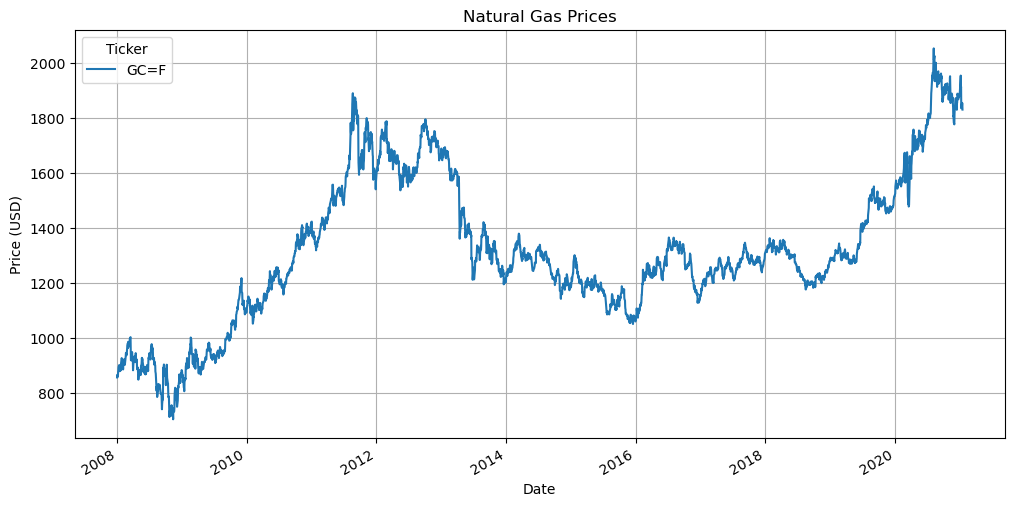

In [5]:

data['Close'].plot(figsize=(12,6), title='Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()

<Axes: ylabel='Count'>

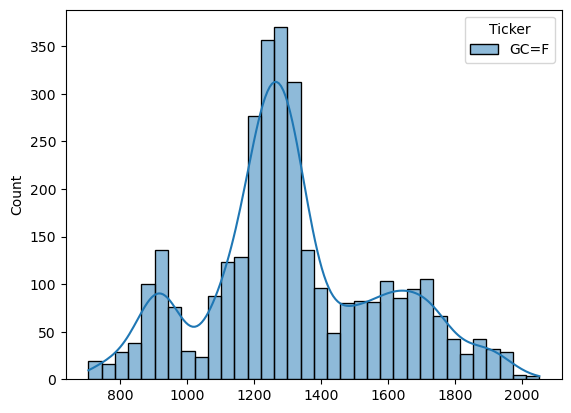

In [6]:
sns.histplot(data['Close'],kde=True)

In [7]:
X = data.drop('Close',axis=1)
y = data['Close']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2624, 4)
(657, 4)
(2624, 1)
(657, 1)


In [11]:
y = data['Close']
print(y.shape)


(3281, 1)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [14]:
pred

array([[ 972.42534002],
       [ 996.21114868],
       [1227.59559323],
       [1589.7505046 ],
       [1266.84116219],
       [1105.90670361],
       [1295.74159035],
       [ 915.43744113],
       [1265.76996216],
       [1612.7455466 ],
       [1262.42888314],
       [1217.24779045],
       [1590.26817411],
       [1216.88502983],
       [1332.85893628],
       [1287.75166953],
       [ 773.21999182],
       [1283.19219071],
       [1306.88272337],
       [ 923.24308142],
       [1580.67055991],
       [ 878.63100346],
       [1308.77664091],
       [1155.18179845],
       [ 753.32877723],
       [ 917.78807898],
       [1274.4103287 ],
       [1582.05670867],
       [1189.8834471 ],
       [1306.40854235],
       [1645.48842345],
       [1310.66469768],
       [1499.4724201 ],
       [1717.74062365],
       [1244.81006153],
       [1259.08916396],
       [1678.01623527],
       [ 808.272802  ],
       [ 855.59916144],
       [ 897.71443172],
       [1510.90111278],
       [ 937.172

In [15]:
# if we want to see if the data is linear or not , with also corr, scatter plots


# from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

# Fit a model:
#model = LinearRegression()
#model.fit(X, y)
#y_pred = model.predict(X)

# Residuals:
#residuals = y - y_pred


#sns.residplot(x=y_pred, y=residuals)

# -----------------------------------------

# 🔹 MSE (Mean Squared Error):
# يقيس متوسط مربعات الفروق بين القيم الحقيقية والمتوقعة.
# كل ما قلت القيمة، كان النموذج أدق.

# 🔹 RMSE (Root Mean Squared Error):
# الجذر التربيعي لـ MSE — يعطي فكرة عن متوسط الخطأ بوحدة y الأصلية (مثل ريال، درجة...).
# رقم صغير يعني أن التوقعات قريبة جدًا من القيم الحقيقية.

# 🔹 R² (R-squared):
# يوضح كم نسبة التباين في y يقدر النموذج يفسرها.
# القيمة بين 0 و 1 — وكل ما قربت من 1 كان النموذج ممتاز في الشرح.



In [16]:
import numpy as np

In [17]:
from sklearn.metrics import mean_squared_error,r2_score

In [18]:
def calculate(y_test,y_pred):
    
    ## y_test = your ground truth

   ## y_pred = is the model predict value 

  
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)

    print('mse:',mse)
    print('rmse',rmse)
    print('r2-',r2)

calculate(y_test,pred)

mse: 29.11081342323746
rmse 5.395443765181643
r2- 0.999582722788491


-------------------------------------------------------------------------------------------------------

In [19]:
from sklearn.linear_model import Lasso,Ridge

In [20]:
la = Lasso().fit(X_train,y_train)
Ri = Ridge().fit(X_train,y_train)

la_p = la.predict(X_test)
Ri_p = Ri.predict(X_test)

C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.601e+04, tolerance: 1.805e+04
  model = cd_fast.enet_coordinate_descent(


In [21]:
calculate(y_test,la_p)

mse: 31.514105626543067
rmse 5.613742568602792
r2- 0.9995482737659076


In [22]:
calculate(y_test,Ri_p)

mse: 29.1106316267512
rmse 5.395426917932556
r2- 0.9995827253943794


In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()

params = { 'C' :[0.1,1,10,100,1000],
          'gamma':[1,0.1,0.01,0.001,0.0001],
          'kernel':['rbf']}

grid = GridSearchCV(estimator=svr,param_grid=params,refit=True,verbose=3,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-67824.931 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-69661.617 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-73408.551 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-69675.027 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-69492.455 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=0.1, gamma=0.1, kernel=rbf;, score=-67822.462 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=0.1, gamma=0.1, kernel=rbf;, score=-69660.960 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=0.1, gamma=0.1, kernel=rbf;, score=-73407.086 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=0.1, gamma=0.1, kernel=rbf;, score=-69674.488 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=0.1, gamma=0.1, kernel=rbf;, score=-69491.782 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.1, gamma=0.01, kernel=rbf;, score=-67809.724 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.1, gamma=0.01, kernel=rbf;, score=-69644.841 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.1, gamma=0.01, kernel=rbf;, score=-73387.728 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.1, gamma=0.01, kernel=rbf;, score=-69659.042 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.1, gamma=0.01, kernel=rbf;, score=-69477.492 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.1, gamma=0.001, kernel=rbf;, score=-67662.059 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.1, gamma=0.001, kernel=rbf;, score=-69460.742 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.1, gamma=0.001, kernel=rbf;, score=-73210.558 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.1, gamma=0.001, kernel=rbf;, score=-69473.449 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.1, gamma=0.001, kernel=rbf;, score=-69352.128 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.1, gamma=0.0001, kernel=rbf;, score=-66413.358 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.1, gamma=0.0001, kernel=rbf;, score=-68271.818 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.1, gamma=0.0001, kernel=rbf;, score=-71961.856 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.1, gamma=0.0001, kernel=rbf;, score=-68237.852 total time=   0.1s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=rbf;, score=-68053.299 total time=   0.1s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=1, kernel=rbf;, score=-67836.469 total time=   0.1s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=1, kernel=rbf;, score=-69663.770 total time=   0.1s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=1, kernel=rbf;, score=-73405.152 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=1, kernel=rbf;, score=-69672.666 total time=   0.1s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=1, kernel=rbf;, score=-69488.789 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1, gamma=0.1, kernel=rbf;, score=-67825.176 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1, gamma=0.1, kernel=rbf;, score=-69663.423 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1, gamma=0.1, kernel=rbf;, score=-73397.872 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1, gamma=0.1, kernel=rbf;, score=-69668.404 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1, gamma=0.1, kernel=rbf;, score=-69480.091 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1, gamma=0.01, kernel=rbf;, score=-67703.609 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1, gamma=0.01, kernel=rbf;, score=-69502.950 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1, gamma=0.01, kernel=rbf;, score=-73262.477 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1, gamma=0.01, kernel=rbf;, score=-69514.666 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1, gamma=0.01, kernel=rbf;, score=-69383.889 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=1, gamma=0.001, kernel=rbf;, score=-66097.868 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=1, gamma=0.001, kernel=rbf;, score=-67802.592 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=1, gamma=0.001, kernel=rbf;, score=-71543.554 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=1, gamma=0.001, kernel=rbf;, score=-67813.316 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=1, gamma=0.001, kernel=rbf;, score=-67752.268 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1, gamma=0.0001, kernel=rbf;, score=-56483.595 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1, gamma=0.0001, kernel=rbf;, score=-58652.505 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1, gamma=0.0001, kernel=rbf;, score=-61701.415 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1, gamma=0.0001, kernel=rbf;, score=-58295.567 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1, gamma=0.0001, kernel=rbf;, score=-58096.768 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=1, kernel=rbf;, score=-67891.988 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=1, kernel=rbf;, score=-69701.514 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=1, kernel=rbf;, score=-73442.651 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=1, kernel=rbf;, score=-69676.634 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=1, kernel=rbf;, score=-69555.219 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=10, gamma=0.1, kernel=rbf;, score=-67846.027 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=10, gamma=0.1, kernel=rbf;, score=-69638.515 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=10, gamma=0.1, kernel=rbf;, score=-73405.423 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=10, gamma=0.1, kernel=rbf;, score=-69630.170 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=10, gamma=0.1, kernel=rbf;, score=-69508.951 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=10, gamma=0.01, kernel=rbf;, score=-66556.239 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=10, gamma=0.01, kernel=rbf;, score=-68183.370 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=10, gamma=0.01, kernel=rbf;, score=-72051.993 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=10, gamma=0.01, kernel=rbf;, score=-68304.571 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=10, gamma=0.01, kernel=rbf;, score=-68203.155 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=10, gamma=0.001, kernel=rbf;, score=-54523.554 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, gamma=0.001, kernel=rbf;, score=-55938.597 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=10, gamma=0.001, kernel=rbf;, score=-59284.939 total time=   0.1s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, gamma=0.001, kernel=rbf;, score=-56216.054 total time=   0.1s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=10, gamma=0.001, kernel=rbf;, score=-56066.997 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=10, gamma=0.0001, kernel=rbf;, score=-25862.832 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, gamma=0.0001, kernel=rbf;, score=-26973.184 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=10, gamma=0.0001, kernel=rbf;, score=-28193.101 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, gamma=0.0001, kernel=rbf;, score=-24765.066 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=10, gamma=0.0001, kernel=rbf;, score=-27617.918 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=1, kernel=rbf;, score=-67535.062 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=1, kernel=rbf;, score=-69443.822 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=1, kernel=rbf;, score=-73149.789 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=1, kernel=rbf;, score=-69545.967 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=1, kernel=rbf;, score=-69240.978 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=100, gamma=0.1, kernel=rbf;, score=-67081.087 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=100, gamma=0.1, kernel=rbf;, score=-68944.348 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=100, gamma=0.1, kernel=rbf;, score=-72746.460 total time=   0.1s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=100, gamma=0.1, kernel=rbf;, score=-69143.218 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=100, gamma=0.1, kernel=rbf;, score=-68652.235 total time=   0.1s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, gamma=0.01, kernel=rbf;, score=-57905.873 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, gamma=0.01, kernel=rbf;, score=-58901.925 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, gamma=0.01, kernel=rbf;, score=-63322.503 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, gamma=0.01, kernel=rbf;, score=-60454.789 total time=   0.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, gamma=0.01, kernel=rbf;, score=-59563.689 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, gamma=0.001, kernel=rbf;, score=-28997.289 total time=   1.0s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, gamma=0.001, kernel=rbf;, score=-28724.702 total time=   0.6s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, gamma=0.001, kernel=rbf;, score=-29636.965 total time=   0.8s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, gamma=0.001, kernel=rbf;, score=-28376.300 total time=   0.7s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, gamma=0.001, kernel=rbf;, score=-30391.211 total time=   0.5s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, gamma=0.0001, kernel=rbf;, score=-10360.095 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, gamma=0.0001, kernel=rbf;, score=-9467.350 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, gamma=0.0001, kernel=rbf;, score=-10631.836 total time=   0.4s
[CV 4/5] END C=100, gamma=0.0001, kernel=rbf;, score=-6000.223 total time=   0.5s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, gamma=0.0001, kernel=rbf;, score=-12195.530 total time=   0.5s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=1, kernel=rbf;, score=-66228.071 total time=   0.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=1, kernel=rbf;, score=-68328.536 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=1, kernel=rbf;, score=-72112.787 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=1, kernel=rbf;, score=-69798.530 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=1, kernel=rbf;, score=-67663.080 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, gamma=0.1, kernel=rbf;, score=-65098.905 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, gamma=0.1, kernel=rbf;, score=-67183.179 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, gamma=0.1, kernel=rbf;, score=-71066.069 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.1, kernel=rbf;, score=-68746.366 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.1, kernel=rbf;, score=-66269.430 total time=   0.4s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, gamma=0.01, kernel=rbf;, score=-49187.255 total time=   0.6s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, gamma=0.01, kernel=rbf;, score=-50244.436 total time=   0.6s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, gamma=0.01, kernel=rbf;, score=-55241.275 total time=   0.6s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.01, kernel=rbf;, score=-52690.061 total time=   0.6s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.01, kernel=rbf;, score=-51652.605 total time=   0.6s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, gamma=0.001, kernel=rbf;, score=-19812.849 total time=   4.1s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, gamma=0.001, kernel=rbf;, score=-18263.551 total time=   4.6s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, gamma=0.001, kernel=rbf;, score=-19950.003 total time=   4.3s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.001, kernel=rbf;, score=-16977.348 total time=   3.5s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.001, kernel=rbf;, score=-21068.053 total time=   5.9s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, gamma=0.0001, kernel=rbf;, score=-7011.519 total time=   7.2s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, gamma=0.0001, kernel=rbf;, score=-7159.488 total time=   7.0s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, gamma=0.0001, kernel=rbf;, score=-8141.596 total time=   6.8s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.0001, kernel=rbf;, score=-4149.542 total time=   8.8s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.0001, kernel=rbf;, score=-9405.864 total time=   7.9s


C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [24]:
print(grid.best_params_)      # أفضل مجموعة باراميترات تم اختيارها
print(grid.best_estimator_ )  # النموذج الأفضل الذي تم تدريبه بهذه الباراميترات
print(grid.best_score_)       # الأداء الأفضل (عادة R² في حالة SVR)


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.0001)
-7173.601940759271


In [25]:
svr = SVR(C=100,gamma=0.01,kernel='rbf')
svr.fit(X_train,y_train)
svr_predict = svr.predict(X_test)

C:\Users\wasee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
calculate(y_test,svr_predict)

mse: 59322.37479896188
rmse 243.5618500483232
r2- 0.14966734950649507


In [27]:
import joblib

In [28]:
joblib.dump(svr, 'model.pkl')


['model.pkl']

In [29]:
model = joblib.load('model.pkl')

In [30]:
model

,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [31]:
import joblib
model = joblib.load("model.pkl")
model.predict([[100, 12333, 98, 556666000]])


array([1301.77139552])

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_fixed = y_train.values.ravel()


svr = SVR(C=100, gamma=0.01, kernel='rbf')
svr.fit(X_train_scaled, y_train_fixed)
y_pred = svr.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"R² = {r2:.4f}")

joblib.dump((svr, scaler), 'model2025.pkl')

MSE = 118.725
RMSE = 10.896
R² = 0.9983


['model2025.pkl']